In [1]:
import pandas as pd
network_name = ['PPI', 'ca-HepTh', 'ca-AstroPh', 'wiki-vote', 'soc-epinions']

In [2]:
p2v_result = pd.read_csv('graph/p2v_speed.tsv', sep='\t')
p2v_result.columns = ['name', 'mean', 'sem']
p2v_mean = []
p2v_sem = []
for network in network_name:
    temp_df = p2v_result[p2v_result.name == network]
    p2v_mean.append(list(temp_df['mean'])[0])
    p2v_sem.append(list(temp_df['sem'])[0])

In [3]:
splitter_result = pd.read_csv('graph/splitter_speed.tsv', sep='\t')
splitter_result.columns = ['name', 'mean', 'sem']
splitter_mean = []
splitter_sem = []
for network in network_name:
    temp_df = splitter_result[splitter_result.name == network]
    splitter_mean.append(list(temp_df['mean'])[0])
    splitter_sem.append(list(temp_df['sem'])[0])

In [4]:
splitter_one_epoch_result = pd.read_csv('graph/splitter_one_epoch_speed.tsv', sep='\t')
splitter_one_epoch_result.columns = ['name', 'mean', 'sem']
splitter_one_epoch_mean = []
splitter_one_epoch_sem = []
for network in network_name:
    temp_df = splitter_one_epoch_result[splitter_one_epoch_result.name == network]
    splitter_one_epoch_mean.append(list(temp_df['mean'])[0])
    splitter_one_epoch_sem.append(list(temp_df['sem'])[0])

In [5]:
persona2vec_mean = [45.8099, 45.78, 126.1, 82.8, 885.6]
persona2vec_sem = [0.4806, 0.6801, 2.079, 2.459, 15.15]

In [6]:
[x/y for x,y in zip(splitter_one_epoch_mean, p2v_mean)]

[7.121144119502554,
 7.956837046745304,
 6.706785884218874,
 6.193136473429952,
 5.074302506775068]

In [7]:
[x/y for x,y in zip(splitter_mean, splitter_one_epoch_mean)]

[7.470877990208415,
 7.3003170777238475,
 7.275901512748165,
 9.000577037420847,
 7.810050544502147]

In [8]:
[x/y for x,y in zip(splitter_mean,  p2v_mean)]

[53.20119886749371,
 58.087433377020524,
 48.79791356066614,
 55.741801932367146,
 39.63055905600723]

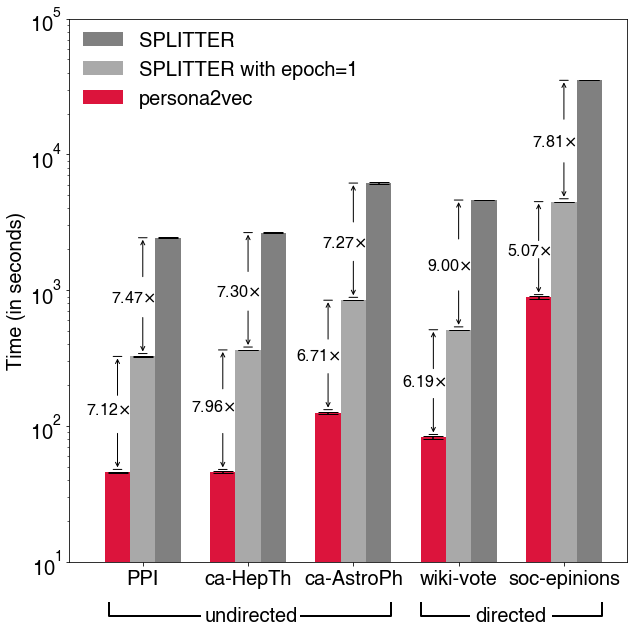

In [13]:
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib.font_manager as font_manager
import numpy as np

path = '/u/yoonjis/Helvetica.ttf'
prop = font_manager.FontProperties(fname=path, size=20)
medium_prop = font_manager.FontProperties(fname=path, size=16)
small_prop = font_manager.FontProperties(fname=path, size=20)
directed_prop = font_manager.FontProperties(fname=path, size=20)
rcParams['figure.figsize'] = 10, 10

fig, ax = plt.subplots()
x_pos = np.array([0, 2.5, 5, 7.5, 10])
width = 0.6
ax.bar(x_pos + width, splitter_mean, yerr=splitter_sem, align='center', width=width, ecolor='black', color='grey', capsize=10, label='SPLITTER')
ax.bar(x_pos , splitter_one_epoch_mean, yerr=splitter_one_epoch_sem, align='center', width=width, color='darkgrey', ecolor='black', capsize=10, label='SPLITTER with epoch=1')
ax.bar(x_pos - width, p2v_mean, yerr=p2v_sem, align='center', width=width, ecolor='black', color='crimson', capsize=10, label='persona2vec')
ax.set_ylabel('Time (in seconds)', fontproperties=prop)
ax.set_xticks(x_pos)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
for label in ax.get_yticklabels():
    label.set_fontproperties(small_prop)
ax.set_xticklabels(network_name)
ax.legend(bbox_to_anchor=(0.55, 1.01), prop=prop, frameon=False)
ax.set_xlim((-1.75,11.5))
ax.set_yscale('log')
ax.set_ylim([10, 100000])

for i, (x, y_start, y_end) in enumerate(zip(x_pos, p2v_mean, splitter_one_epoch_mean)):
    ax.annotate("", xy=(x-(width*3/4),y_start* 1.05), xytext=(x-(width*5/4),y_start*1.05),
                arrowprops=dict(arrowstyle="-"))    
    ax.annotate("", xy=(x-(width),y_start*1.05), xytext=(x-(width),y_start*2),
                arrowprops=dict(arrowstyle="->"))
    ax.annotate("", xy=(x-(width*3/4),y_end), xytext=(x-(width*5/4),y_end),
                arrowprops=dict(arrowstyle="-"))
    ax.annotate("", xy=(x-(width),y_end), xytext=(x-(width),y_end/2),
                arrowprops=dict(arrowstyle="->"))
    center_point = np.power(10, (np.log10(y_start + 10) + np.log10(y_end))/2)/1.1
    if i == 0:
        plt.text(x-1.35, center_point, r'7.12$\times$', fontproperties=medium_prop)
    if i == 1:
        plt.text(x-1.35, center_point, r'7.96$\times$', fontproperties=medium_prop)
    if i == 2:
        plt.text(x-1.35, center_point, r'6.71$\times$', fontproperties=medium_prop)   
    if i == 3:
        plt.text(x-1.35, center_point, r'6.19$\times$', fontproperties=medium_prop) 
    if i == 4:
        plt.text(x-1.35, center_point, r'5.07$\times$', fontproperties=medium_prop)  
        
        
for i, (x, y_start, y_end) in enumerate(zip(x_pos, splitter_one_epoch_mean, splitter_mean)):
    x += width
    ax.annotate("", xy=(x-(width*3/4),y_start* 1.05), xytext=(x-(width*5/4),y_start*1.05),
                arrowprops=dict(arrowstyle="-"))    
    ax.annotate("", xy=(x-(width),y_start*1.05), xytext=(x-(width),y_start*2),
                arrowprops=dict(arrowstyle="->"))
    ax.annotate("", xy=(x-(width*3/4),y_end), xytext=(x-(width*5/4),y_end),
                arrowprops=dict(arrowstyle="-"))
    ax.annotate("", xy=(x-(width),y_end), xytext=(x-(width),y_end/2),
                arrowprops=dict(arrowstyle="->"))
    center_point = np.power(10, (np.log10(y_start + 10) + np.log10(y_end))/2)/1.1
    if i == 0:
        plt.text(x-1.35, center_point, r'7.47$\times$', fontproperties=medium_prop)
    if i == 1:
        plt.text(x-1.35, center_point, r'7.30$\times$', fontproperties=medium_prop)
    if i == 2:
        plt.text(x-1.35, center_point, r'7.27$\times$', fontproperties=medium_prop)   
    if i == 3:
        plt.text(x-1.35, center_point, r'9.00$\times$', fontproperties=medium_prop) 
    if i == 4:
        plt.text(x-1.35, center_point, r'7.81$\times$', fontproperties=medium_prop)  
        
        
start = -0.8
end = 5.9
width=1.2
med = (start + end) / 2
plt.plot([start, start, med -width], [5, 4, 4], '-', linewidth=2, clip_on=False, c='black')
plt.plot([med+width, end, end], [4, 4, 5], '-', linewidth=2, clip_on=False, c='black')
plt.text(1.48,3.7, 'undirected', fontproperties=directed_prop)

start = 6.6
end = 10.9
width=1
med = (start + end) / 2
plt.plot([start, start, med -width], [5, 4, 4], '-', linewidth=2, clip_on=False, c='black')
plt.plot([med+width, end, end], [4, 4, 5], '-', linewidth=2, clip_on=False, c='black')
plt.text(7.9, 3.7, 'directed', fontproperties=directed_prop)


plt.savefig('speed_analysis.pdf', bbox_inches='tight')    